<a href="https://colab.research.google.com/github/thevasukush/Stock-Market-Price-Prediction_vkns53/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [ ]:
gstock_data = pd.read_csv('GOOG.csv')

In [ ]:
gstock_data = gstock_data [['Date','Close']]

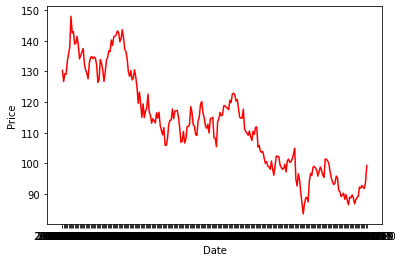

In [ ]:
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(gstock_data.Date,gstock_data.Close,color='red')
plt.show()

In [ ]:
close_data = gstock_data.filter(['Close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .85))
print(training)

213


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f34314e3910>>

In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=10)

Epoch 1/10
5/5 [==============================] - 5s 64ms/step - loss: 0.0670
Epoch 2/10
5/5 [==============================] - 0s 66ms/step - loss: 0.0341
Epoch 3/10
5/5 [==============================] - 0s 70ms/step - loss: 0.0202
Epoch 4/10
5/5 [==============================] - 0s 65ms/step - loss: 0.0149
Epoch 5/10
5/5 [==============================] - 0s 66ms/step - loss: 0.0157
Epoch 6/10
5/5 [==============================] - 0s 64ms/step - loss: 0.0165
Epoch 7/10
5/5 [==============================] - 0s 63ms/step - loss: 0.0152
Epoch 8/10
5/5 [==============================] - 0s 65ms/step - loss: 0.0136
Epoch 9/10
5/5 [==============================] - 0s 67ms/step - loss: 0.0114
Epoch 10/10
5/5 [==============================] - 0s 62ms/step - loss: 0.0144


In [ ]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

2/2 [==============================] - 1s 14ms/step
MSE 18.260267208523196
RMSE 4.273203389557207


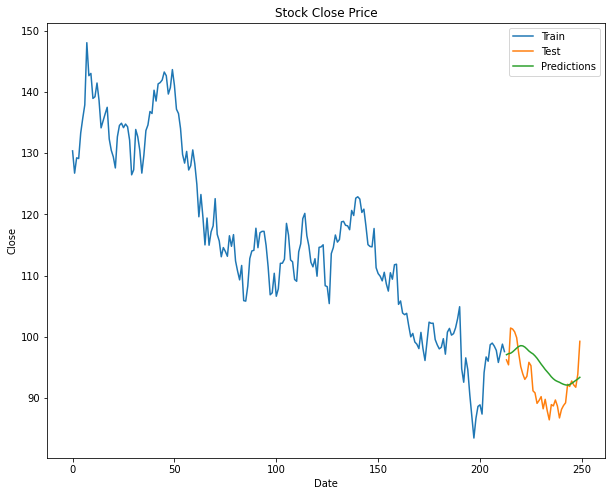

In [ ]:
train = gstock_data[:training]
test = gstock_data[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.title('Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])